<a id='main' name="main"></a>
# Viral Data Analysis

Date: 2021.10.15

Author: © 2021 [Murugannatham Jaisankar](https://www.linkedin.com/in/jaimuruganantham/) 

This notebook is part of an individual project for [KTU IF](https://fi.ktu.edu/)  [P176M010 Advanced Machine Learning](https://admissions.ktu.edu/programme/m-software-engineering/#P176M010) class led by [M. Lukoševičius](http://mantas.info/).

Here we analyze open COVID-19 data from [Our World in Data](https://ourworldindata.org/) to answer the following questions:

1. [What is the correlation between female and male smokers in Asia and Europe?](#Q1)
1. [Are there children who stopped enrolling in Venezuela primary education? (by geography)](#Q2)
1. [Are there children who stopped enrolling in Venezuela secondary education who also have internet connections?](#Q3)

We are additionally uses data from:
* [The Humanitarian Data Exchange](https://data.humdata.org/dataset/open_one_time_covid_education_impact#metadata-0)



This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International license</a>. <a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons licencija" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a> 

## Load the data

In [ ]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import requests
fname = 'owid-covid-data.csv'
url = 'https://covid.ourworldindata.org/data/' + fname
r = requests.get(url)
open(fname, 'wb').write(r.content)

41506356

Load the file to Pandas.

In [ ]:
url_ourworld = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
# download the file locally when developing, not to DoS the server:
#url = "owid-covid-data.csv" 
df_Smokers = pd.read_csv(url_ourworld, parse_dates=[3])
url_hdx="https://data.humdata.org/dataset/ad5456ed-7fe5-4512-ac59-0a051d604954/resource/8b0deb33-d6b9-4115-a0d1-3ccad389321c/download/open_one_time_covid_education_impact.csv"
#url_hdx = "open_one_time_covid_education_impact.csv"
df_Education=pd.read_csv(url_hdx, parse_dates=[3])

In [ ]:
#information about the data from ourworld
df_Smokers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133082 entries, 0 to 133081
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   iso_code                                 133082 non-null  object        
 1   continent                                124582 non-null  object        
 2   location                                 133082 non-null  object        
 3   date                                     133082 non-null  datetime64[ns]
 4   total_cases                              125824 non-null  float64       
 5   new_cases                                125822 non-null  float64       
 6   new_cases_smoothed                       124779 non-null  float64       
 7   total_deaths                             114691 non-null  float64       
 8   new_deaths                               114887 non-null  float64       
 9   new_deaths_smoothed       

The columns are explained [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).

In [ ]:
#describtion of the data from ourworld
df_Smokers.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.258240e+05,125822.000000,124779.000000,1.146910e+05,114887.000000,124779.000000,125178.000000,125176.000000,124138.000000,114058.000000,114254.000000,124138.000000,104981.000000,15968.000000,15968.000000,18710.000000,18710.000000,1340.000000,1340.000000,2127.000000,2127.000000,5.566100e+04,5.598500e+04,55985.000000,55661.000000,6.774500e+04,67745.000000,63236.000000,62576.000000,3.356900e+04,3.201300e+04,2.902800e+04,5.942000e+03,2.794500e+04,5.974900e+04,33569.000000,32013.000000,29028.000000,5942.000000,59749.000000,108320.000000,1.321330e+05,120466.000000,114798.000000,113528.000000,114171.000000,115549.000000,77271.000000,115043.000000,118806.000000,89621.000000,88325.000000,57903.000000,104548.000000,123718.000000,115149.000000,4656.000000,4656.000000,4656.000000,4656.000000
mean,2.049020e+06,8361.113160,8377.084802,5.064728e+04,183.942161,168.581236,19743.521077,86.502110,86.392769,404.596047,1.583660,1.447076,0.998739,894.262024,22.173318,4011.560021,155.195360,229.032718,16.395244,3082.799435,84.197953,5.751668e+04,1.214613e+07,511.212239,2.541607,5.364333e+04,2.416073,0.086402,160.468421,1.085876e+08,5.915861e+07,4.064899e+07,3.124902e+06,1.055029e+06,5.042699e+05,51.395459,29.694091,23.368356,2.848696,3415.417697,56.353978,1.574776e+08,399.133088,30.498393,8.744139,5.531854,19228.847806,13.508442,260.004978,8.039689,10.589635,32.748964,50.863232,3.029350,73.260225,0.726195,32052.628565,8.667889,15.883224,781.114218
std,1.169135e+07,43572.247331,43050.010696,2.599152e+05,871.178922,817.372312,32711.527864,199.383251,168.744384,664.800109,4.112138,3.095672,0.341137,2812.803909,24.426018,11168.845043,209.757383,500.215024,31.414140,10476.556885,138.694711,1.973382e+05,4.983914e+07,1248.810703,6.673089,1.756071e+05,5.704692,0.095723,849.798726,5.099292e+08,2.826504e+08,2.062262e+08,1.018546e+07,4.093094e+06,2.773521e+06,50.237912,26.122380,23.823996,6.828622,4134.315121,20.638357,7.285251e+08,1861.326297,9.116015,6.183054,4.216163,20060.276513,19.992264,119.850113,4.309738,10.502611,13.513210,31.821149,2.455487,7.532186,0.150040,90422.651800,15.939853,31.062810,1166.907295
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.000000,-75.911000,-10.844000,-0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000e+01,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-319

In [ ]:
#Main_data
df_Smokers.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
#information about the data from The Humanitarian Data ExchangeThe Humanitarian Data Exchange
df_Education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4782 entries, 0 to 4781
Data columns (total 27 columns):
 #   Column                                                                  Non-Null Count  Dtype 
---  ------                                                                  --------------  ----- 
 0   submission_id                                                           4782 non-null   int64 
 1   submission_date                                                         4782 non-null   object
 2   gender                                                                  4782 non-null   object
 3   age                                                                     4782 non-null   object
 4   geography                                                               4782 non-null   object
 5   financial_situation                                                     4782 non-null   object
 6   education                                                               4782 non-null   

In [ ]:
#describtion of the data from The Humanitarian Data ExchangeThe Humanitarian Data Exchange
df_Education.describe()

,submission_id,are_there_children_0_to_2_yrs_out_of_educational_system,were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school,are_there_children_who_stopped_enrolling_in_primary_education,are_there_children_who_stopped_enrolling_in_secondary_education,are_children_attending_face_to_face_classes,can_children_observe_deterioration_of_basic_services_of_school,are_children_3_to_17_yrs_dealing_with_irregular_school_activity,are_children_being_teached_by_unqualified_people,did_teachers_leave_the_educational_system,do_school_and_the_teachers_have_internet_connection,do_children_have_internet_connection,do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity,does_home_shows_severe_deficit_of_electricity,does_home_shows_severe_deficit_of_internet,do_children_3_to_17_yrs_miss_class_or_in_lower_grade,are_children_promoted_with_a_modality_different_from_formal_evaluation
count,4.782000e+03,4782.000000,4782.000000,4782.000000,4782.000000,4782.000000,4782.000000,4782.000000,4782.000000,4782.000000,4782.000000,4782.000000,4782.000000,4782.000000,4782.000000,4782.000000,4782.000000
mean,5.630727e+15,0.298411,0.610832,0.209118,0.197198,0.171267,0.801129,0.638227,0.316395,0.664366,0.558971,0.630071,0.667503,0.283145,0.583020,0.252196,0.432873
std,6.458612e+14,0.457609,0.487612,0.406721,0.397925,0.376782,0.399192,0.480564,0.465118,0.472261,0.496562,0.482836,0.471157,0.450573,0.493111,0.434318,0.495525
min,4.503608e+15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.076503e+15,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.635263e+15,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,6.182534e+15,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,6.755339e+15,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Main_data
df_Education.head()

,submission_id,submission_date,gender,age,geography,financial_situation,education,employment_status,submission_state,are_there_children_0_to_2_yrs_out_of_educational_system,were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school,are_there_children_who_stopped_enrolling_in_primary_education,are_there_children_who_stopped_enrolling_in_secondary_education,are_children_attending_face_to_face_classes,can_children_observe_deterioration_of_basic_services_of_school,do_children_3_and_17_yrs_receive_regular_school_meals,are_there_teachers_at_scheduled_class_hours,are_children_3_to_17_yrs_dealing_with_irregular_school_activity,are_children_being_teached_by_unqualified_people,did_teachers_leave_the_educational_system,do_school_and_the_teachers_have_internet_connection,do_children_have_internet_connection,do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity,does_home_shows_severe_deficit_of_electricity,does_home_shows_severe_deficit_of_internet,do_children_3_to_17_yrs_miss_class_or_in_lower_grade,are_children_promoted_with_a_modality_different_from_formal_evaluation
0,4570534489882624,2021-03-17,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,0,1,1,0,0,1,Every day,Irregularly,0,0,0,1,1,0,0,0,0,0
1,5856891153678336,2021-03-15,Female,36 to 45 years old,City center or metropolitan area,"I can comfortably afford food, clothes, and fu...",Technical school diploma or degree completed,"I work full-time, either as an employee or sel...",Miranda,0,0,1,1,0,0,2 days,Irregularly,0,1,1,1,0,0,0,0,0,1
2,5127524404428800,2021-03-24,Female,26 to 35 years old,Suburban/Peri-urban,I cannot afford enough food for my family,Some secondary school / high school,"I do housework, fulfilling domestic tasks, loo...",Miranda,0,1,0,0,0,1,No,Irregularly,0,0,0,0,0,1,0,1,0,0
3,6440166989496320,2021-03-29,Male,26 to 35 years old,Suburban/Peri-urban,I cannot afford enough food for my family,University or college degree completed,I am unemployed,Miranda,0,1,0,0,0,1,No,Irregularly,1,0,1,0,1,1,0,0,0,0
4,5819398672875520,2021-03-15,Female,36 to 45 years old,Suburban/Peri-urban,"I can afford food, regular expenses, and cloth...",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1,0,0,1,0,1,No,Irregularly,1,0,1,0,1,1,1,1,0,1


[back to the top](#main)
<a id='Q1' name='Q1'></a>
## 1. What is the correlation between female and male smokers in Asia and Europe? 

Here we are going to get number of smokers from ourworld data

In [ ]:
column_set=['continent','female_smokers','male_smokers']
List_of_Smokers=df_Smokers[column_set]

Now, we have to get number of female and male smokers by continent

In [ ]:
#List of continent
df_Smokers.continent.unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

Here, we are extracting female and male smokers data only from Asia.

In [ ]:
row_set_asia=df_Smokers['continent']=="Asia"
List_of_Smokers_asia=df_Smokers[row_set_asia]
List_of_Smokers_asia=List_of_Smokers_asia[column_set]

Additionally, we are getting data of female and male smokers only from Europe.

In [ ]:
row_set_europe=df_Smokers['continent']=="Europe" 
List_of_Smokers_europe=df_Smokers[row_set_europe]
List_of_Smokers_europe=List_of_Smokers_europe[column_set]

Furthermore, we are merging female and male smokers data from both Asia and Europe

In [ ]:
frames=[List_of_Smokers_asia, List_of_Smokers_europe]
merged_df=pd.concat(frames)

In [ ]:
#Describtion of merged data
merged_df.describe()

,female_smokers,male_smokers
count,52049.000000,52049.000000
mean,14.327463,37.503199
std,11.352180,11.916817
min,0.300000,15.200000
25%,2.800000,28.900000
50%,14.100000,37.400000
75%,23.300000,44.700000
max,44.000000,78.100000


To be specific, correaltion between female and male smokers from Asia and Europe are here.

In [ ]:
data = merged_df.groupby("continent").sum()
data.rename(columns={'female_smokers':'Number of female smokers','male_smokers':'Number of male smokers' }, inplace=True)

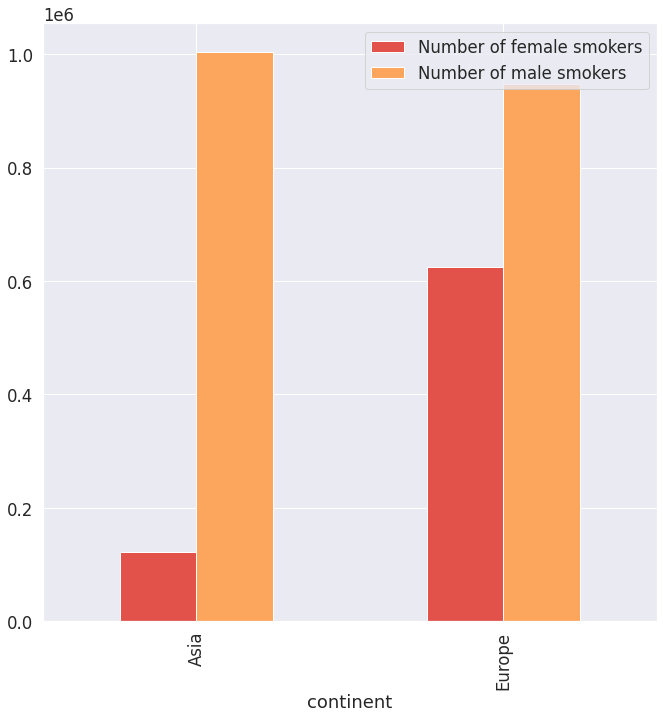

In [ ]:
data.plot.bar( y=['Number of female smokers','Number of male smokers'],figsize=(11,11))

In conclusion females from Asia smoke lesser than European females, also lesser than Asian and European males. Asian male smokers higher than European male smokers.

[back to the top](#main)
<a id='Q2' name='Q2'></a>
## 2. Are there children who stopped enrolling in Venezuela's primary education? (by geography)

Here, we are going to analyze Venezuela’s primary education enrollment of children by geography using survey data of "The Humanitarian Data Exchange".


 Now, We are going to get Number of people who said, "Children stopped enrolling in Venezuela primary education" by georaphy.

In [ ]:
rowset_edu1=['geography','are_there_children_who_stopped_enrolling_in_primary_education']
df_Education_yes=df_Education[rowset_edu1]  
df_Primary_yes = df_Education_yes.groupby('geography').sum()  # grouping to get data geographycally 
df_Primary_yes = df_Primary_yes.rename(columns={'are_there_children_who_stopped_enrolling_in_primary_education': 'Number of people said YES'})   
df_Primary_yes

,Number of people said YES
geography,
City center or metropolitan area,401
Not Available,1
Rural,310
Suburban/Peri-urban,288


Subsequenlty. we are going to get Number of people who said, "Children not stopped enrolling in Venezuela primary education" by georaphy.

In [ ]:
df_Education_no=df_Education[rowset_edu1]
df_Education_no.are_there_children_who_stopped_enrolling_in_primary_education.replace((1, 0),(0, 1), inplace=True)
df_Primary_no=df_Education_no.groupby('geography').sum()    # grouping to get data geographycally 
df_Primary_no= df_Primary_no.rename(columns={'are_there_children_who_stopped_enrolling_in_primary_education': 'Number of people said NO'}) 
df_Primary_no

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Number of people said NO
geography,
City center or metropolitan area,1705
Not Available,0
Rural,907
Suburban/Peri-urban,1170


In [ ]:
# merging data to know differences by geography
merged_df= pd.merge(df_Primary_yes, df_Primary_no, how='inner', on = 'geography')
merged_df

,Number of people said YES,Number of people said NO
geography,,
City center or metropolitan area,401,1705
Not Available,1,0
Rural,310,907
Suburban/Peri-urban,288,1170


Finally, here are the details of the number of children who stopped enrolling in Venezuela’s primary education by geography.

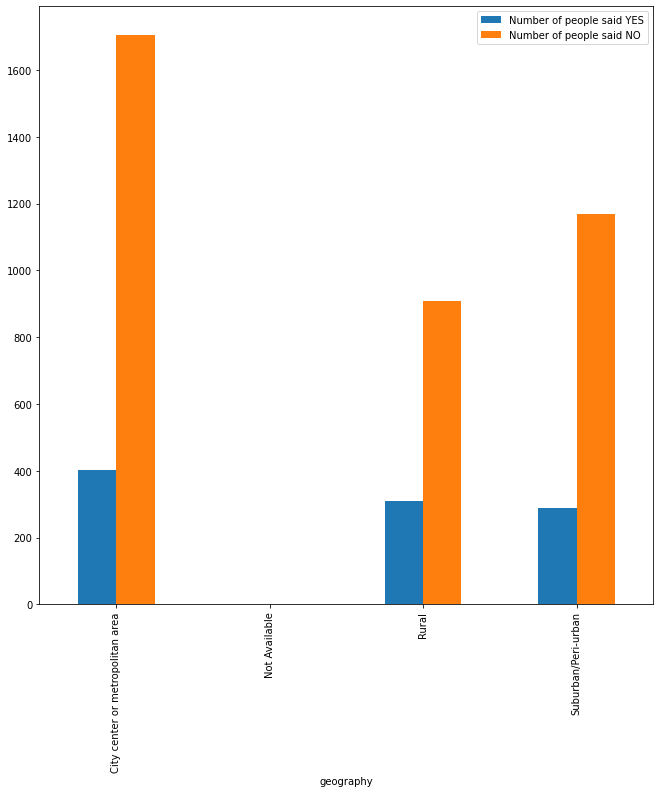

In [ ]:
merged_df.plot.bar(y=['Number of people said YES','Number of people said NO'], figsize=(11,11))

The Survey reveals that more number of children did not stop enrolling in Venezuela primary education in City center or metropolitan area when compared to Rural and Suburban/peri-urban area, also conveys that more number of children stopped in City center or metropolitan area when compared to other areas.

[back to the top](#main)
<a id='Q3' name='Q3'></a>
## 3. Are there children who stopped enrolling in Venezuela's secondary education who also have internet connections? 

Here, we are going to get prediction details of children who stopped enrolling in Venezuela's secondary education who also don't have an internet connection.

In [60]:
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

In [62]:
df_Education.isnull().sum()

submission_id                                                             0
submission_date                                                           0
gender                                                                    0
age                                                                       0
geography                                                                 0
financial_situation                                                       0
education                                                                 0
employment_status                                                         0
submission_state                                                          0
are_there_children_0_to_2_yrs_out_of_educational_system                   0
were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school           0
are_there_children_who_stopped_enrolling_in_primary_education             0
are_there_children_who_stopped_enrolling_in_secondary_education           0
are_children

In [63]:
X = df_Education.iloc[:, [13, 22]].values
X

array([[0, 0],
       [0, 0],
       [0, 1],
       ...,
       [0, 0],
       [1, 1],
       [0, 1]])

In [64]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/dist-packa

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


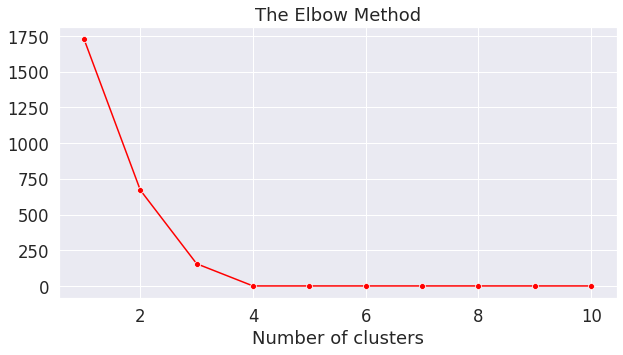

In [65]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.show()

In [66]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

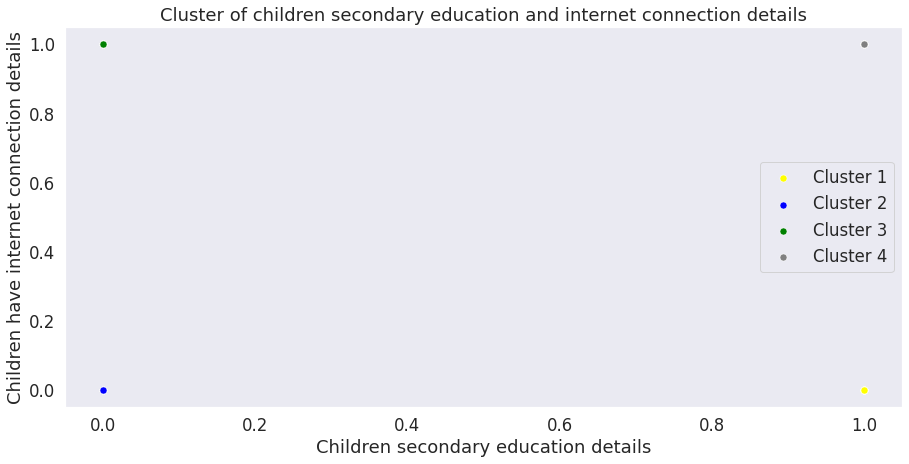

In [68]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
#sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Cluster of children secondary education and internet connection details')
plt.xlabel('Children secondary education details')
plt.ylabel('Children have internet connection details')
plt.legend()
plt.show()

Cluster 1=> Children who have stopped secondary education also they don't have internet connection

Cluster 2=> Children who have not stopped secondary education also they don't have internet connection

Cluster 3=> Children who have not stopped secondary education also they have internet connection

Cluster 4=> Children who have stopped secondary education also they have internet connection


Cluster 4 gives answer to the question.

[back to the top](#main)